# Import Libaries

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Numpy and Pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [4]:
import statsmodels.api as sm

# Data Understanding, Preparation, and EDA

## Reading & Understanding Data

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
# Load the data
df = pd.read_csv("train.csv")

# Display the first few rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
# check descriptive information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

### Check for Duplicates

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicates removed.")

df.shape


Number of duplicate rows: 0

Duplicates removed.


(1460, 81)

### Check for NULLs

In [10]:
# Check for missing values and calculate percentage
null = df.isnull().sum()
total_rows = df.shape[0]
missing_percentage = round(((null / total_rows) * 100), 2)

# Display missing values and percentage
missing_info = pd.concat([null, missing_percentage], axis=1, keys=['Total Missing', 'Percentage'])

In [11]:
# Identify columns with missing percentage
missing_info = missing_info[missing_info['Percentage'] > 0] # Adjust threshold as needed

print("\nMissing values and percentage in the dataset:")
missing_info


Missing values and percentage in the dataset:


,Total Missing,Percentage
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


In [12]:
# Identify columns with high missing percentage
high_missing_cols = missing_info[missing_info['Percentage'] > 30] # Adjust threshold as needed

print("\nColumns with more than 30% missing values:")
high_missing_cols


Columns with more than 30% missing values:


,Total Missing,Percentage
Alley,1369,93.77
FireplaceQu,690,47.26
PoolQC,1453,99.52
Fence,1179,80.75
MiscFeature,1406,96.30


In [13]:
# Decide which columns to clean from the dataset
# You may choose to drop columns with high missing values or use other imputation techniques
columns_to_drop = high_missing_cols.index.tolist()
print("\nColumns to clean from the dataset:")
columns_to_drop


Columns to clean from the dataset:


['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
df_cleaned.shape

(1460, 76)

In [16]:
# Categorical values
categorical_vals = df_cleaned.select_dtypes(include=['object'])
categorical_cols = categorical_vals.columns

In [17]:
# For categorical columns, fill missing values with mode
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

In [18]:
# Calculate the percentage of null values after imputing with mode for categorical columns
total_rows = len(df_cleaned)
null_percentage_after_imputation = round(((df_cleaned.isnull().sum() / total_rows) * 100), 2)
columns_with_null_after_imputation = null_percentage_after_imputation[null_percentage_after_imputation > 0]
print("Null percentage after imputing with mode for categorical columns:")
columns_with_null_after_imputation

Null percentage after imputing with mode for categorical columns:


LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [19]:
# Description of numerical columns after imputation
col_null = columns_with_null_after_imputation.index.tolist()

col_null_description = df_cleaned[col_null].describe()
print("Description of numerical columns after imputing with mode for categorical columns:")
col_null_description

Description of numerical columns after imputing with mode for categorical columns:


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [20]:
# Numerical values
numerical_vals = df_cleaned.select_dtypes(include=['int64', 'float64'])
numerical_cols = numerical_vals.columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
# For numerical columns, fill missing values with mean
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

In [22]:
# Impute missing values in 'LotFrontage' column with the median value grouped by 'Neighborhood'
df_cleaned['LotFrontage'] = df_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Impute missing values in 'GarageYrBlt' column with the median value of the column
df_cleaned["GarageYrBlt"].fillna(df_cleaned["GarageYrBlt"].median(), inplace=True)

# Impute missing values in 'MasVnrArea' column with the median value of the column
df_cleaned["MasVnrArea"].fillna(df_cleaned["MasVnrArea"].median(), inplace=True)

In [23]:
col_null_description = df_cleaned[col_null].describe()
print("Description after imputing with mean for categorical columns:")
col_null_description

Description after imputing with mean for categorical columns:


,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,70.049958,103.685262,1978.506164
std,22.024023,180.569112,23.994583
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,70.049958,0.000000,1978.506164
75%,79.000000,164.250000,2001.000000
max,313.000000,1600.000000,2010.000000


In [24]:
df[numerical_cols].value_counts()

Id    MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
1     60          65.0         8450     7            5            2003       2003          196.0       706         0           150        856          856       854       0             1710       1             0             2         1         3             1             8             0           2003.0       2           548         0           61           0              0          0            0         0        2       2008    208500       1
963   160         24.0         2308     6            6            1976       1976          0.0         556 

In [25]:
df[['PoolArea','MiscVal','3SsnPorch']].value_counts()

PoolArea  MiscVal  3SsnPorch
0         0        0            1379
          400      0              11
          500      0               8
          700      0               4
          600      0               4
          450      0               4
          2000     0               3
          0        168             3
                   216             2
          1200     0               2
          480      0               2
          0        180             2
                   144             2
                   196             1
                   130             1
          1300     0               1
          1400     0               1
          0        96              1
          2500     0               1
          3500     0               1
          8300     0               1
          800      0               1
          15500    0               1
480       0        0               1
512       0        0               1
519       2000     0               1
555      

In [26]:
# Dropping columns dominated by one value
columns_to_drop = ['PoolArea', 'MiscVal', '3SsnPorch', 'Id']
df_cleaned = df_cleaned.drop(columns_to_drop, axis=1)

In [27]:
df_cleaned.shape

(1460, 72)

In [28]:
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,0,0,12,2008,WD,Normal,250000


In [29]:
df_cleaned.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


### Outlier detection

In [30]:
numerical_cols = numerical_cols.drop(columns_to_drop)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df_cleaned[numerical_cols].quantile(0.05)
Q3 = df_cleaned[numerical_cols].quantile(0.95)
IQR = Q3 - Q1

# Filter out rows that contain outliers
df_cleaned = df_cleaned[~((df_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## EDA and Visualisation

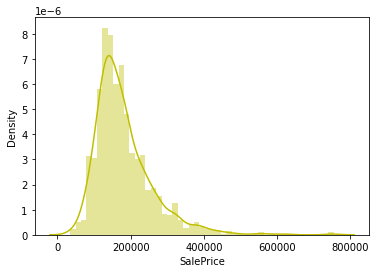

In [31]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'], color='y')
plt.show()

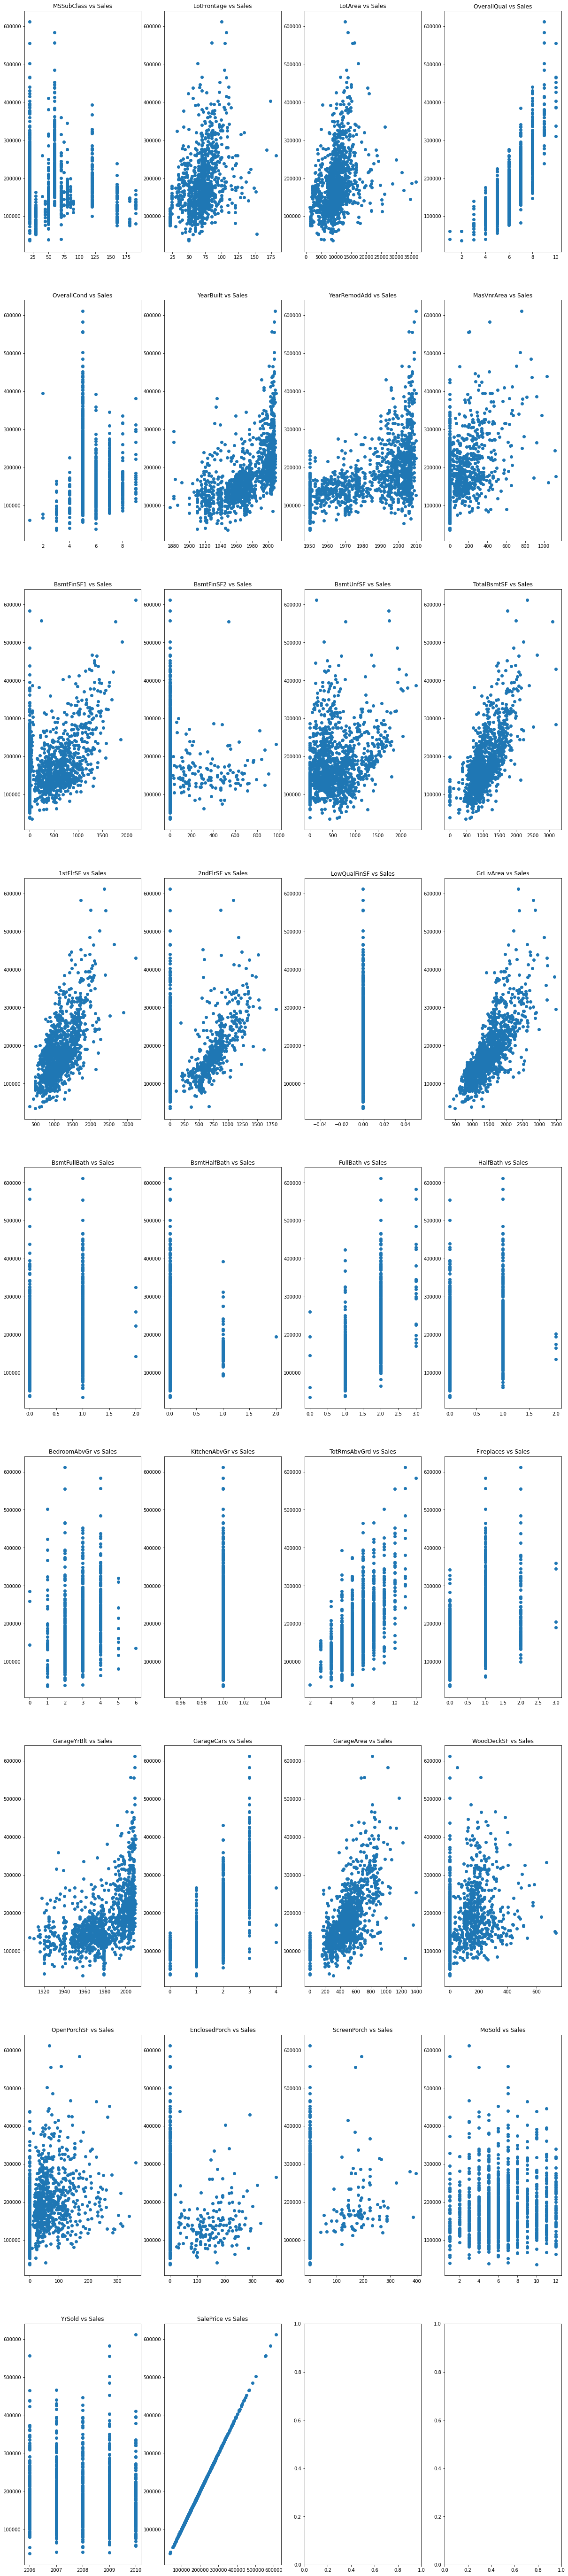

In [32]:
# Calculate the number of rows needed
num_rows = (len(numerical_cols) + 3) // 4  # Round up to the nearest integer

# Create subplots
fig, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=(20.5, 100))

# Flatten the axis array for easier iteration
ax = ax.flatten()


# Loop through each feature and plot against SalePrice
for i, feature in enumerate(numerical_cols):
    scatter = ax[i].scatter(df_cleaned[feature], df_cleaned['SalePrice'])
    scatter.set_label(feature)
    ax[i].set_title(f'{feature} vs Sales')

plt.show()

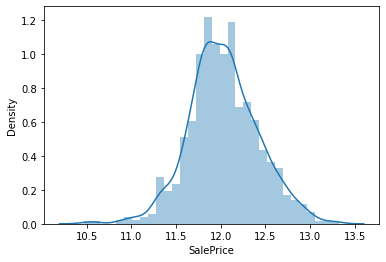

In [33]:
# Apply log transformation to the 'SalePrice' column
df_cleaned['SalePrice'] = np.log1p(df_cleaned['SalePrice'])

# Plot the distribution of the transformed 'SalePrice' column
plt.figure()
sns.distplot(df_cleaned['SalePrice'])
plt.show()

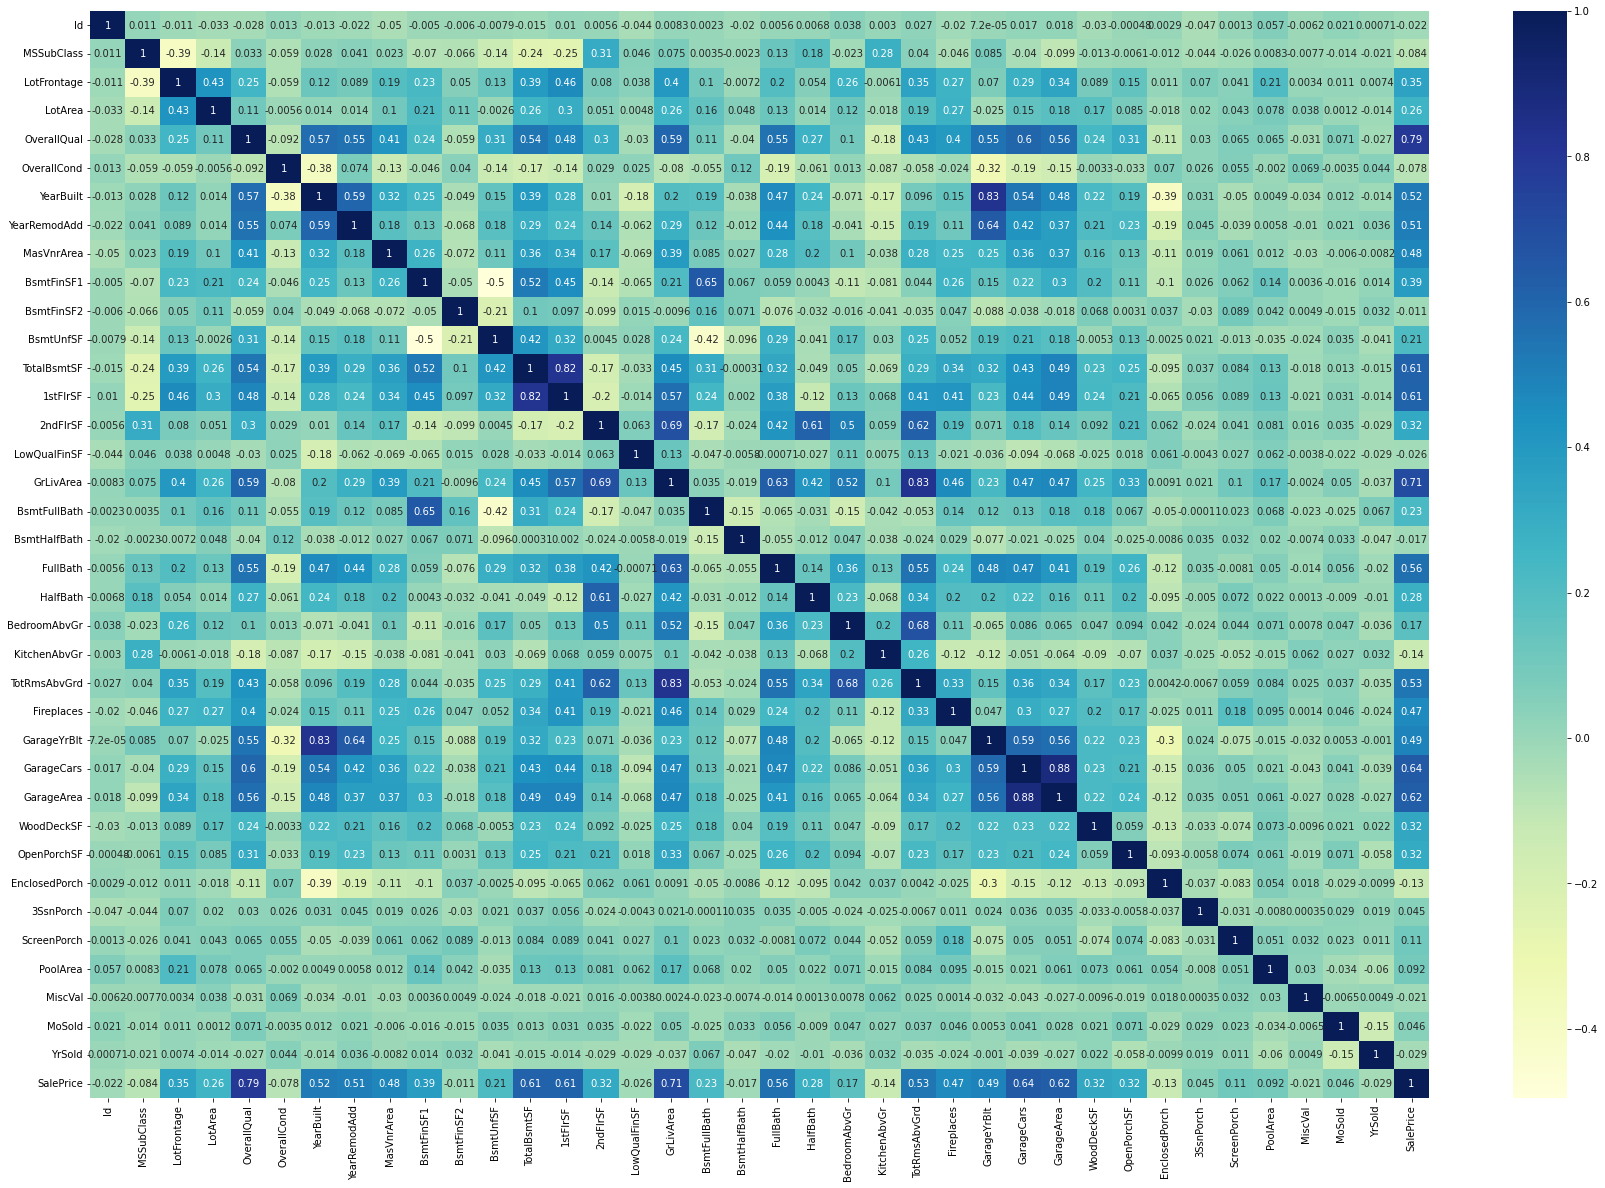

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,20))
sns.heatmap(numerical_vals.corr(), annot = True, cmap="YlGnBu")
plt.show()

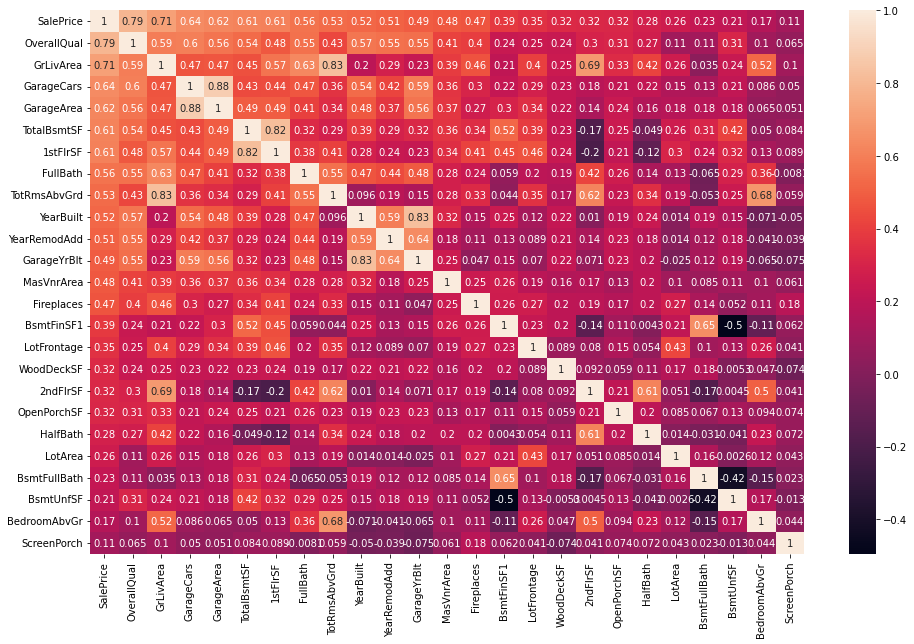

In [35]:
# Sales price correlation matrix
plt.figure(figsize=(16, 10))

# Number of variables with the highest correlation with 'SalePrice'
n = 25

# Calculating the correlation matrix
corrmat = df_cleaned.corr()

# Selecting the columns with the highest correlation with 'SalePrice'
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index

# Plotting the heatmap
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

# Variables highly correlated to SalePrice: OverallQual, GrLivArea, GarageCars, TotalBsmtSF, GarageArea, 1stFlrSF

In [36]:
# Remove columns that are not contributing to sales price
df_cleaned = df_cleaned.drop(['BsmtUnfSF','GarageCars','TotRmsAbvGrd','GarageYrBlt'], axis = 1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,272,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,0,0,12,2008,WD,Normal,12.429220


In [37]:
df_cleaned.shape

(1333, 68)

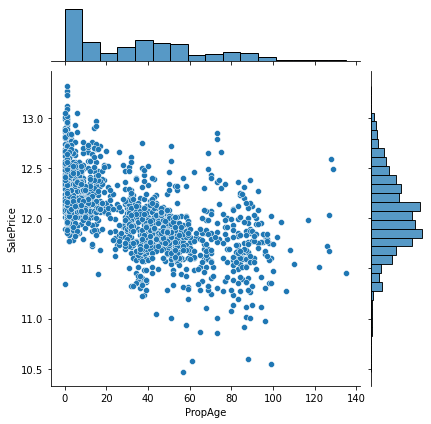

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,WD,Normal,12.429220,8


In [38]:
# Create Age of Property column in replacement for Month sold and Year Sold, Year built and Year remodelled
# Calculate property age (PropAge) as the difference between YrSold and YearBuilt
df_cleaned['PropAge'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']

# Drop unnecessary columns
df_cleaned.drop(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

# Visualize the relationship between property age and sale price
sns.jointplot(x=df_cleaned['PropAge'], y=df_cleaned['SalePrice'])
plt.show()

# Display the updated DataFrame
df_cleaned.head()

In [39]:
# Convert categorical values into dummy variables
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [40]:
numerical_vals = df_cleaned.select_dtypes(exclude=['object'])

In [41]:
numerical_cols = numerical_vals.columns
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=215)

## Split Data

In [42]:
# Define features (X) and target variable (y)
X = df_cleaned.drop('SalePrice', axis=1)  # Features
y = df_cleaned['SalePrice']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1066, 214)
Shape of y_train: (1066,)
Shape of X_test: (267, 214)
Shape of y_test: (267,)


In [43]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1402,20,64.000000,6762,7,5,0.0,0,0,1286,1294,...,0,0,1,0,0,0,0,0,0,1
1214,85,69.000000,10205,5,5,0.0,784,0,925,999,...,0,0,0,0,1,0,0,0,1,0
1064,20,70.049958,11000,5,6,200.0,740,230,1154,1154,...,0,0,0,0,1,0,0,0,1,0
653,50,60.000000,10320,6,7,0.0,0,0,756,756,...,0,0,0,0,1,0,0,0,1,0
191,60,70.049958,7472,7,9,138.0,626,0,725,725,...,0,0,0,0,1,0,0,0,1,0


In [44]:
y_train.head()

1402    12.174995
1214    11.809327
1064    11.944714
653     11.813037
191     12.122696
Name: SalePrice, dtype: float64

In [45]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,60,82.000000,9452,8,5,423.0,1074,0,1396,1407,...,0,0,0,0,1,0,0,0,1,0
1161,20,70.049958,14778,6,7,72.0,728,0,1296,1640,...,0,0,0,0,1,0,0,0,1,0
1369,20,48.000000,10635,8,5,171.0,370,972,1657,1668,...,0,0,0,0,1,0,0,0,1,0
329,70,60.000000,6402,5,5,0.0,0,0,596,596,...,0,0,0,0,1,0,0,0,1,0
262,80,88.000000,8471,6,7,46.0,506,0,506,1212,...,0,0,0,0,1,0,0,0,1,0


In [46]:
y_test.head()

990     12.759961
1161    12.319406
1369    12.354497
329     11.264477
262     11.925042
Name: SalePrice, dtype: float64

In [47]:
num_vars = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

In [48]:
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge
1402,20,64.000000,6762,7,5,0.0,0,0,1286,1294,...,0,2,1,1,662,168,55,0,0,0
1214,85,69.000000,10205,5,5,0.0,784,0,925,999,...,0,3,1,0,300,150,72,0,0,44
1064,20,70.049958,11000,5,6,200.0,740,230,1154,1154,...,1,3,1,1,480,0,58,0,0,43
653,50,60.000000,10320,6,7,0.0,0,0,756,756,...,0,3,1,0,216,57,0,239,0,102
191,60,70.049958,7472,7,9,138.0,626,0,725,725,...,1,4,1,0,484,0,32,0,0,35


In [49]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,...,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.00000
mean,53.808630,69.312375,9697.060038,6.100375,5.604128,101.979467,440.316135,40.485929,1048.452158,1143.204503,...,0.002814,0.002814,0.085366,0.001876,0.865854,0.0,0.003752,0.013133,0.830206,0.08818
std,40.892473,19.836455,4189.722075,1.325184,1.101830,169.095013,423.877146,135.287044,397.040294,363.118788,...,0.053000,0.053000,0.279557,0.043294,0.340969,0.0,0.061170,0.113899,0.375628,0.28369
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,480.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,0.000000,0.000000,0.000000,796.000000,866.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.00000
50%,50.000000,70.049958,9375.000000,6.000000,5.000000,0.000000,394.500000,0.000000,990.000000,1071.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.00000
75%,60.000000,78.000000,11424.500000,7.000000,6.000000,162.000000,712.000000,0.000000,1264.000000,1359.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.00000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,1129.000000,2188.000000,906.000000,3206.000000,3228.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000


In [50]:
scaler = MinMaxScaler()

In [51]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [52]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1402,0.000000,0.267081,0.155170,0.666667,0.500,0.000000,0.000000,0.000000,0.401123,0.296215,...,0,0,1,0,0,0,0,0,0,1
1214,0.382353,0.298137,0.252983,0.444444,0.500,0.000000,0.358318,0.000000,0.288522,0.188865,...,0,0,0,0,1,0,0,0,1,0
1064,0.000000,0.304658,0.275568,0.444444,0.625,0.177148,0.338208,0.253863,0.359950,0.245269,...,0,0,0,0,1,0,0,0,1,0
653,0.176471,0.242236,0.256250,0.555556,0.750,0.000000,0.000000,0.000000,0.235808,0.100437,...,0,0,0,0,1,0,0,0,1,0
191,0.235294,0.304658,0.175341,0.666667,1.000,0.122232,0.286106,0.000000,0.226138,0.089156,...,0,0,0,0,1,0,0,0,1,0


In [53]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,0.235294,0.378882,0.231591,0.777778,0.50,0.374668,0.490859,0.000000,0.435434,0.337336,...,0,0,0,0,1,0,0,0,1,0
1161,0.000000,0.304658,0.382898,0.555556,0.75,0.063773,0.332724,0.000000,0.404242,0.422125,...,0,0,0,0,1,0,0,0,1,0
1369,0.000000,0.167702,0.265199,0.777778,0.50,0.151461,0.169104,1.072848,0.516843,0.432314,...,0,0,0,0,1,0,0,0,1,0
329,0.294118,0.242236,0.144943,0.444444,0.50,0.000000,0.000000,0.000000,0.185901,0.042213,...,0,0,0,0,1,0,0,0,1,0
262,0.352941,0.416149,0.203722,0.555556,0.75,0.040744,0.231261,0.000000,0.157829,0.266376,...,0,0,0,0,1,0,0,0,1,0


In [54]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,...,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.00000
mean,0.198874,0.300077,0.238553,0.566708,0.575516,0.090327,0.201241,0.044686,0.327028,0.241341,...,0.002814,0.002814,0.085366,0.001876,0.865854,0.0,0.003752,0.013133,0.830206,0.08818
std,0.240544,0.123208,0.119026,0.147243,0.137729,0.149774,0.193728,0.149323,0.123843,0.132139,...,0.053000,0.053000,0.279557,0.043294,0.340969,0.0,0.061170,0.113899,0.375628,0.28369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.242236,0.177401,0.444444,0.500000,0.000000,0.000000,0.000000,0.248284,0.140739,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.00000
50%,0.176471,0.304658,0.229403,0.555556,0.500000,0.000000,0.180302,0.000000,0.308796,0.215247,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.00000
75%,0.235294,0.354037,0.287628,0.666667,0.625000,0.143490,0.325411,0.000000,0.394261,0.320051,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000


In [55]:
X_train.shape

(1066, 214)

# Model Building and Evaluation

## RFE

In [56]:
# Creating a Linear Regression model
lm = LinearRegression()

# Fitting the model on the training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) with the desired number of features (10 in this case)
num_features = 100
rfe = RFE(estimator=lm, n_features_to_select=num_features)

# Fitting RFE on the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 39),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 15),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 29),
 ('FullBath', False, 12),
 ('HalfBath', False, 28),
 ('BedroomAbvGr', False, 67),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 4),
 ('ScreenPorch', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', False, 76),
 ('LotShape_IR3', False, 94),
 ('LotShape_Reg', False, 78),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', False, 101),
 ('LandContour_

In [58]:
# Finding the top features selected by RFE
top_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
print(top_features)

[('MSSubClass', False, 39), ('LotFrontage', True, 1), ('LotArea', True, 1), ('OverallQual', True, 1), ('OverallCond', True, 1), ('MasVnrArea', False, 15), ('BsmtFinSF1', True, 1), ('BsmtFinSF2', False, 86), ('TotalBsmtSF', True, 1), ('1stFlrSF', True, 1), ('2ndFlrSF', True, 1), ('LowQualFinSF', True, 1), ('GrLivArea', True, 1), ('BsmtFullBath', True, 1), ('BsmtHalfBath', False, 29), ('FullBath', False, 12), ('HalfBath', False, 28), ('BedroomAbvGr', False, 67), ('KitchenAbvGr', True, 1), ('Fireplaces', True, 1), ('GarageArea', True, 1), ('WoodDeckSF', True, 1), ('OpenPorchSF', True, 1), ('EnclosedPorch', False, 4), ('ScreenPorch', True, 1), ('PropAge', True, 1), ('MSZoning_FV', True, 1), ('MSZoning_RH', True, 1), ('MSZoning_RL', True, 1), ('MSZoning_RM', True, 1), ('Street_Pave', True, 1), ('LotShape_IR2', False, 76), ('LotShape_IR3', False, 94), ('LotShape_Reg', False, 78), ('LandContour_HLS', True, 1), ('LandContour_Low', False, 101), ('LandContour_Lvl', False, 92), ('Utilities_NoSeWa

In [59]:
# Extract the top features
selected_cols = X_train.columns[rfe.support_]
non_selected_cols = X_train.columns[~rfe.support_]

# Check the shape of train and test datasets
X_train_selected = X_train[selected_cols]
X_test_selected = X_test[selected_cols]

print("Shape of selected feature training set:", X_train_selected.shape)
print("Shape of selected feature test set:", X_test_selected.shape)
print("Shape of target training set:", y_train.shape)
print("Shape of target test set:", y_test.shape)

# Fit the linear regression model with the selected features
lm_selected = LinearRegression().fit(X_train_selected, y_train)

# Print the intercept and coefficients
print("Intercept:", lm_selected.intercept_)
print("Coefficients:", lm_selected.coef_)

Shape of selected feature training set: (1066, 100)
Shape of selected feature test set: (267, 100)
Shape of target training set: (1066,)
Shape of target test set: (267,)
Intercept: 10.093569561919855
Coefficients: [ 1.10221112e-01  2.04681432e-01  3.99760670e-01  3.12829138e-01
  1.29102424e-01  2.74569605e-01  2.96845045e+11  1.96384386e+11
 -6.84609196e+09 -3.25470932e+11  5.53605937e-02  6.53707595e+11
  4.35051206e-02  1.94846440e-01  6.59172630e-02  6.90915019e-02
  7.99172983e-02 -4.09059107e-01  4.89144629e-01  4.12006980e-01
  4.28273633e-01  3.85866459e-01  7.44750274e-02  5.91769367e-02
 -1.62358331e-01 -4.95283132e-02 -2.80276754e-01  7.16670370e-02
  1.34464836e-01 -4.35578915e-02 -1.36684587e-01  7.25379074e-02
  9.66457850e-02  1.42980099e-01  5.91735840e-02  1.10473633e-01
  6.33640289e-02  1.05392456e-01  8.67538452e-02  1.48713112e-01
 -1.60212517e-01 -5.22947311e-02 -6.36596680e-02  5.49259186e-02
  9.83219147e-02  5.04990458e-01  3.91109228e-01 -1.21282578e-01
  9.18

In [60]:
# Predictions using the RFE selected features
y_pred_train = lm_selected.predict(X_train_selected)
y_pred_test = lm_selected.predict(X_test_selected)

# List to store evaluation metrics
metrics = []

# R^2 score for training set
r2_train_lr = r2_score(y_train, y_pred_train)
print("R^2 score for training set:", r2_train_lr)
metrics.append(r2_train_lr)

# R^2 score for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print("R^2 score for test set:", r2_test_lr)
metrics.append(r2_test_lr)

# Residual Sum of Squares (RSS) for training set
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for training set:", rss_train_lr)
metrics.append(rss_train_lr)

# Residual Sum of Squares (RSS) for test set
rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test set:", rss_test_lr)
metrics.append(rss_test_lr)

# Root Mean Squared Error (RMSE) for training set
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for training set:", rmse_train_lr)
metrics.append(rmse_train_lr)

# Root Mean Squared Error (RMSE) for test set
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for test set:", rmse_test_lr)
metrics.append(rmse_test_lr)

R^2 score for training set: 0.9410395741665916
R^2 score for test set: -2.6364874948511804e+16
RSS for training set: 9.290232290564031
RSS for test set: 1.195587903921785e+18
RMSE for training set: 0.09335437682400811
RMSE for test set: 66916793.99118819


# Ridge and Lasso Regression

## Ridge

In [61]:
# List of alphas to tune
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
          8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]

# Creating Ridge model instance
ridge = Ridge()

# Cross-validation parameters
folds = 5

# Setting up GridSearchCV
ridge_grid = GridSearchCV(estimator=ridge, 
                          param_grid={'alpha': alphas}, 
                          scoring='neg_mean_absolute_error', 
                          cv=folds, 
                          return_train_score=True,
                          verbose=1)

# Fitting the model
ridge_grid.fit(X_train_selected, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best parameters found by GridSearchCV
print("Best parameters:", ridge_grid.best_params_)

# Printing the best mean absolute error score
print("Best negative mean absolute error score:", ridge_grid.best_score_)

# Setting the alpha value to the best value found
alpha = ridge_grid.best_params_['alpha']

# Creating Ridge model instance with the best alpha
ridge = Ridge(alpha=alpha)

# Fitting the model on the selected features
ridge.fit(X_train_selected, y_train)

# Printing the coefficients
print("Ridge coefficients:", ridge.coef_)

Best parameters: {'alpha': 2.0}
Best negative mean absolute error score: -0.07674892083186458
Ridge coefficients: [ 0.10538066  0.16406287  0.42182112  0.27313418  0.14123308  0.26423984
  0.34679891  0.22042016  0.          0.44929547  0.05316963  0.
  0.05864255  0.19848455  0.07463195  0.08311053  0.0755168  -0.35678686
  0.224641    0.13962793  0.17528702  0.12271194  0.13061226  0.0508495
 -0.04384495 -0.02138972 -0.07923171  0.06744123  0.13292059 -0.0368268
 -0.12492965  0.07046099  0.08885512  0.11551845  0.02731229  0.08598803
  0.0261869   0.06029875  0.06429363  0.0996175  -0.03953932  0.01646358
 -0.06026728  0.05156001  0.06043051  0.07279982  0.06016365 -0.02440205
  0.03423119 -0.00291362 -0.03647063 -0.03094225  0.02763145 -0.00291362
  0.          0.02963238  0.02360144  0.01491488  0.04873386 -0.02382716
 -0.01689715 -0.04256956  0.00959737  0.0818626  -0.04059675  0.0439835
  0.05631385  0.03786529  0.02362098  0.07663599 -0.13776788  0.00424436
  0.06934243  0.08370

In [63]:
# Convert cross-validation results to a DataFrame
cv_results = pd.DataFrame(ridge_grid.cv_results_)

# Filter results for alphas less than or equal to 1
cv_results_filtered = cv_results[cv_results['param_alpha'] <= 1]

# Display the first few rows of filtered results
cv_results_filtered.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008778,0.001718,0.003004,0.000615,0.0001,{'alpha': 0.0001},-0.080166,-0.079072,-0.082426,-0.089503,...,-0.079642,0.007271,19,-0.065288,-0.065370,-0.065282,-0.063443,-0.068426,-0.065562,0.001605
1,0.006383,0.000483,0.003787,0.001168,0.001,{'alpha': 0.001},-0.080164,-0.079073,-0.082420,-0.089461,...,-0.079634,0.007256,18,-0.065292,-0.065372,-0.065286,-0.063448,-0.068430,-0.065566,0.001605
2,0.006585,0.000798,0.003193,0.000396,0.01,{'alpha': 0.01},-0.080141,-0.079080,-0.082364,-0.089051,...,-0.079553,0.007115,16,-0.065322,-0.065392,-0.065322,-0.063491,-0.068467,-0.065599,0.001604
3,0.005982,0.001094,0.003389,0.000487,0.05,{'alpha': 0.05},-0.080020,-0.079104,-0.082102,-0.087493,...,-0.079222,0.006594,15,-0.065440,-0.065510,-0.065464,-0.063673,-0.068602,-0.065738,0.001593
4,0.006785,0.000746,0.003388,0.001020,0.1,{'alpha': 0.1},-0.079852,-0.079117,-0.081768,-0.085977,...,-0.078865,0.006110,14,-0.065560,-0.065636,-0.065607,-0.063892,-0.068733,-0.065885,0.001570


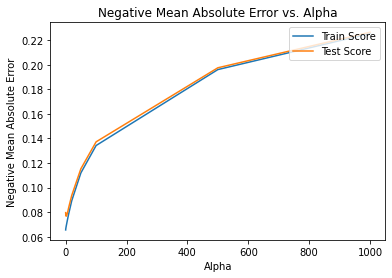

In [68]:
# Convert the alpha parameter to float32 for plotting
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], -cv_results['mean_train_score'], label='Train Score')
plt.plot(cv_results['param_alpha'], -cv_results['mean_test_score'], label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs. Alpha")
plt.legend(loc='upper right')
plt.show()

In [64]:
# Predictions using the Ridge model
y_pred_train_ridge = ridge.predict(X_train_selected)
y_pred_test_ridge = ridge.predict(X_test_selected)

# List to store evaluation metrics
metrics_ridge = []

# R^2 score for training set
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("R^2 score for training set:", r2_train_ridge)
metrics_ridge.append(r2_train_ridge)

# R^2 score for test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("R^2 score for test set:", r2_test_ridge)
metrics_ridge.append(r2_test_ridge)

# Residual Sum of Squares (RSS) for training set
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print("RSS for training set:", rss_train_ridge)
metrics_ridge.append(rss_train_ridge)

# Residual Sum of Squares (RSS) for test set
rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS for test set:", rss_test_ridge)
metrics_ridge.append(rss_test_ridge)

# Root Mean Squared Error (RMSE) for training set
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print("RMSE for training set:", rmse_train_ridge)
metrics_ridge.append(rmse_train_ridge)

# Root Mean Squared Error (RMSE) for test set
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
print("RMSE for test set:", rmse_test_ridge)
metrics_ridge.append(rmse_test_ridge)

R^2 score for training set: 0.9353425016020442
R^2 score for test set: 0.9254373709568089
RSS for training set: 10.187904360477322
RSS for test set: 3.3812478740271246
RMSE for training set: 0.09776059301382126
RMSE for test set: 0.11253377144420867


## Lasso

In [71]:
# Creating Lasso model instance
lasso = Lasso()

# Cross-validation parameters
folds = 5

# Setting up GridSearchCV for Lasso regression
lasso_grid = GridSearchCV(estimator=lasso, 
                            param_grid={'alpha': alphas}, 
                            scoring='neg_mean_absolute_error', 
                            cv=folds, 
                            return_train_score=True,
                            verbose=1)            

# Fit the cross-validated Lasso model
lasso_grid.fit(X_train_selected, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best parameters found by GridSearchCV
print("Best parameters:", lasso_grid.best_params_)

# Printing the best mean absolute error score
print("Best negative mean absolute error score:", lasso_grid.best_score_)

# Setting the alpha value to the best value found
alpha = lasso_grid.best_params_['alpha']

# Creating Lasso model instance with the best alpha
lasso = Lasso(alpha=alpha)

# Fitting the model on the selected features
lasso.fit(X_train_selected, y_train)

# Printing the coefficients
print("Lasso coefficients:", ridge.coef_)

Best parameters: {'alpha': 0.0001}
Best negative mean absolute error score: -0.07786111531897129
Lasso coefficients: [ 0.10538066  0.16406287  0.42182112  0.27313418  0.14123308  0.26423984
  0.34679891  0.22042016  0.          0.44929547  0.05316963  0.
  0.05864255  0.19848455  0.07463195  0.08311053  0.0755168  -0.35678686
  0.224641    0.13962793  0.17528702  0.12271194  0.13061226  0.0508495
 -0.04384495 -0.02138972 -0.07923171  0.06744123  0.13292059 -0.0368268
 -0.12492965  0.07046099  0.08885512  0.11551845  0.02731229  0.08598803
  0.0261869   0.06029875  0.06429363  0.0996175  -0.03953932  0.01646358
 -0.06026728  0.05156001  0.06043051  0.07279982  0.06016365 -0.02440205
  0.03423119 -0.00291362 -0.03647063 -0.03094225  0.02763145 -0.00291362
  0.          0.02963238  0.02360144  0.01491488  0.04873386 -0.02382716
 -0.01689715 -0.04256956  0.00959737  0.0818626  -0.04059675  0.0439835
  0.05631385  0.03786529  0.02362098  0.07663599 -0.13776788  0.00424436
  0.06934243  0.08

In [75]:
# Predictions using the Lasso model
y_pred_train_lasso = lasso_grid.predict(X_train_selected)
y_pred_test_lasso = lasso_grid.predict(X_test_selected)

# List to store evaluation metrics
metrics_lasso = []

# R^2 score for training set
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("R^2 score for training set:", r2_train_lasso)
metrics_lasso.append(r2_train_lasso)

# R^2 score for test set
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("R^2 score for test set:", r2_test_lasso)
metrics_lasso.append(r2_test_lasso)

# Residual Sum of Squares (RSS) for training set
rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print("RSS for training set:", rss_train_lasso)
metrics_lasso.append(rss_train_lasso)

# Residual Sum of Squares (RSS) for test set
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS for test set:", rss_test_lasso)
metrics_lasso.append(rss_test_lasso)

# Root Mean Squared Error (RMSE) for training set
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
print("RMSE for training set:", rmse_train_lasso)
metrics_lasso.append(rmse_train_lasso)

# Root Mean Squared Error (RMSE) for test set
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
print("RMSE for test set:", rmse_test_lasso)
metrics_lasso.append(rmse_test_lasso)

R^2 score for training set: 0.9382918824436122
R^2 score for test set: 0.9249908565946103
RSS for training set: 9.723178525407466
RSS for test set: 3.4014962981677463
RMSE for training set: 0.09550487215554977
RMSE for test set: 0.11287021976585125


In [88]:
# Create DataFrames for each model's metrics
lr_df = pd.DataFrame({'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'],
                      'Linear Regression': metrics})
rg_df = pd.DataFrame({'Ridge Regression': metrics_ridge})
ls_df = pd.DataFrame({'Lasso Regression': metrics_lasso})

# Set the 'Metric' column as index for each DataFrame
lr_df.set_index('Metric', inplace=True)
rg_df.index = lr_df.index
ls_df.index = lr_df.index

# Concatenate the DataFrames
final_metric = pd.concat([lr_df, rg_df, ls_df], axis=1)
final_metric


,Linear Regression,Ridge Regression,Lasso Regression
Metric,,,
R2 Score (Train),9.410396e-01,0.935343,0.938292
R2 Score (Test),-2.636487e+16,0.925437,0.924991
RSS (Train),9.290232e+00,10.187904,9.723179
RSS (Test),1.195588e+18,3.381248,3.401496
MSE (Train),9.335438e-02,0.097761,0.095505
MSE (Test),6.691679e+07,0.112534,0.112870


# Model Evaluation

In [89]:
ridge_pred = ridge.predict(X_test_selected)

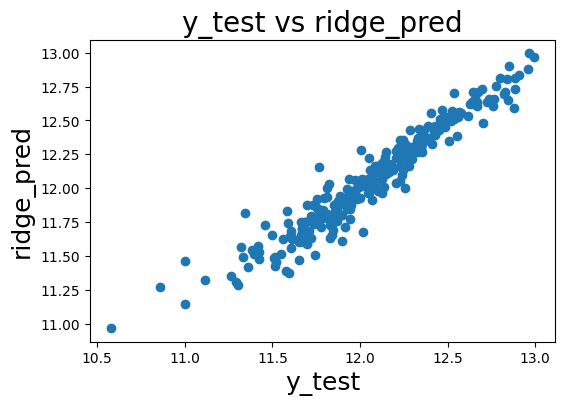

In [90]:
# Plotting y_test and ridge_pred
plt.figure(dpi=100)
plt.scatter(y_test, ridge_pred)
plt.title('y_test vs ridge_pred', fontsize=20)  # Plot title
plt.xlabel('y_test', fontsize=18)  # X-axis label
plt.ylabel('ridge_pred', fontsize=18)  # Y-axis label
plt.show()

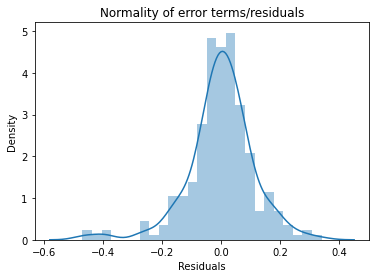

In [91]:
# Calculate residuals
y_res = y_test - ridge_pred

# Plot distribution of residuals
sns.distplot(y_res, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.show()


In [92]:
lasso_pred = lasso.predict(X_test_selected)

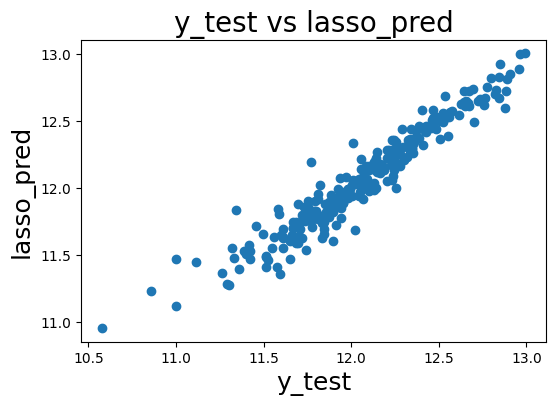

In [93]:
# Plotting y_test and lasso_pred
plt.figure(dpi=100)
plt.scatter(y_test, lasso_pred)
plt.title('y_test vs lasso_pred', fontsize=20)  # Plot title
plt.xlabel('y_test', fontsize=18)  # X-axis label
plt.ylabel('lasso_pred', fontsize=18)  # Y-axis label
plt.show()

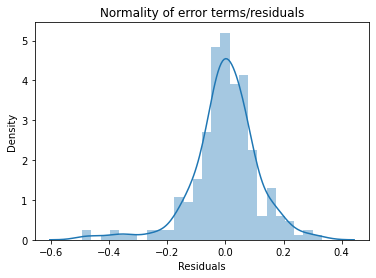

In [94]:
# Calculate residuals
y_res = y_test - lasso_pred

# Plot distribution of residuals
sns.distplot(y_res, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.show()

In [95]:
# Create a DataFrame to store coefficients of predictor variables
betas = pd.DataFrame(index=X_train_selected.columns)

# Assign coefficients of predictor variables for Ridge and Lasso
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

# Display all rows of the DataFrame
pd.set_option('display.max_rows', None)

print(betas.head(68))

                         Ridge     Lasso
LotFrontage           0.105381  0.107901
LotArea               0.164063  0.177212
OverallQual           0.421821  0.447722
OverallCond           0.273134  0.325980
BsmtFinSF1            0.141233  0.135358
TotalBsmtSF           0.264240  0.269386
1stFlrSF              0.346799  0.046070
2ndFlrSF              0.220420  0.000000
LowQualFinSF          0.000000  0.000000
GrLivArea             0.449295  0.858420
BsmtFullBath          0.053170  0.054627
KitchenAbvGr          0.000000  0.000000
Fireplaces            0.058643  0.044125
GarageArea            0.198485  0.189252
WoodDeckSF            0.074632  0.065652
OpenPorchSF           0.083111  0.067216
ScreenPorch           0.075517  0.074779
PropAge              -0.356787 -0.408583
MSZoning_FV           0.224641  0.369098
MSZoning_RH           0.139628  0.297021
MSZoning_RL           0.175287  0.313311
MSZoning_RM           0.122712  0.266639
Street_Pave           0.130612  0.100473
LandContour_HLS 

In [96]:
# Set the new alpha value
alpha = 3

# Create Ridge regression model with the new alpha value
ridge2 = Ridge(alpha=alpha)

# Fit the model to the training data
ridge2.fit(X_train_selected, y_train)

Ridge(alpha=3)

In [99]:
# Predictions using the Ridge model
y_pred_train_ridge = ridge2.predict(X_train_selected)
y_pred_test_ridge = ridge2.predict(X_test_selected)

# List to store evaluation metrics
metrics_ridge2 = []

# R^2 score for training set
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("R^2 score for training set:", r2_train_ridge)
metrics_ridge.append(r2_train_ridge)

# R^2 score for test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("R^2 score for test set:", r2_test_ridge)
metrics_ridge.append(r2_test_ridge)

# Residual Sum of Squares (RSS) for training set
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print("RSS for training set:", rss_train_ridge)
metrics_ridge.append(rss_train_ridge)

# Residual Sum of Squares (RSS) for test set
rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS for test set:", rss_test_ridge)
metrics_ridge.append(rss_test_ridge)

# Root Mean Squared Error (RMSE) for training set
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print("RMSE for training set:", rmse_train_ridge)
metrics_ridge.append(rmse_train_ridge)

# Root Mean Squared Error (RMSE) for test set
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
print("RMSE for test set:", rmse_test_ridge)
metrics_ridge.append(rmse_test_ridge)

R^2 score for training set: 0.9329906855309275
R^2 score for test set: 0.9246755269317131
RSS for training set: 10.55847355662068
RSS for test set: 3.4157957906342946
RMSE for training set: 0.09952265789245243
RMSE for test set: 0.11310721754844677


In [100]:
# Set the new alpha value
alpha = 20

# Create Lasso regression model with the new alpha value
lasso20 = Lasso(alpha=alpha)

# Fit the model to the training data
lasso20.fit(X_train_selected, y_train)

Lasso(alpha=20)

In [101]:
# Predictions using the Lasso model
y_pred_train_lasso = lasso20.predict(X_train_selected)
y_pred_test_lasso = lasso20.predict(X_test_selected)

# List to store evaluation metrics
metrics_lasso2 = []

# R^2 score for training set
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("R^2 score for training set:", r2_train_lasso)
metrics_lasso.append(r2_train_lasso)

# R^2 score for test set
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("R^2 score for test set:", r2_test_lasso)
metrics_lasso.append(r2_test_lasso)

# Residual Sum of Squares (RSS) for training set
rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print("RSS for training set:", rss_train_lasso)
metrics_lasso.append(rss_train_lasso)

# Residual Sum of Squares (RSS) for test set
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS for test set:", rss_test_lasso)
metrics_lasso.append(rss_test_lasso)

# Root Mean Squared Error (RMSE) for training set
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
print("RMSE for training set:", rmse_train_lasso)
metrics_lasso.append(rmse_train_lasso)

# Root Mean Squared Error (RMSE) for test set
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
print("RMSE for test set:", rmse_test_lasso)
metrics_lasso.append(rmse_test_lasso)

R^2 score for training set: 0.0
R^2 score for test set: -0.009146388621901647
RSS for training set: 157.56725225854737
RSS for test set: 45.76252373200815
RMSE for training set: 0.38446284774110023
RMSE for test set: 0.4139990579337928


In [102]:
# Create a DataFrame to store coefficients of predictor variables
betas = pd.DataFrame(index=X_train_selected.columns)

# Assign coefficients of predictor variables for each model
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_

# Display all rows of the DataFrame
pd.set_option('display.max_rows', None)

print(betas.head(68))

                        Ridge2     Ridge     Lasso  Lasso20
LotFrontage           0.101821  0.105381  0.107901      0.0
LotArea               0.153237  0.164063  0.177212      0.0
OverallQual           0.412818  0.421821  0.447722      0.0
OverallCond           0.252328  0.273134  0.325980     -0.0
BsmtFinSF1            0.143719  0.141233  0.135358      0.0
TotalBsmtSF           0.259485  0.264240  0.269386      0.0
1stFlrSF              0.333583  0.346799  0.046070      0.0
2ndFlrSF              0.219456  0.220420  0.000000      0.0
LowQualFinSF          0.000000  0.000000  0.000000      0.0
GrLivArea             0.436660  0.449295  0.858420      0.0
BsmtFullBath          0.052167  0.053170  0.054627      0.0
KitchenAbvGr          0.000000  0.000000  0.000000      0.0
Fireplaces            0.065696  0.058643  0.044125      0.0
GarageArea            0.201205  0.198485  0.189252      0.0
WoodDeckSF            0.076567  0.074632  0.065652      0.0
OpenPorchSF           0.088068  0.083111